In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
ds, info = tfds.load('amazon_us_reviews/Apparel_v1_00', with_info=True, split='train')

In [4]:
ds_pc, info_pc = tfds.load('amazon_us_reviews/Health_Personal_Care_v1_00', with_info=True, split='train')

In [30]:
ds_home, info_home = tfds.load('amazon_us_reviews/Home_Improvement_v1_00', with_info=True, split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling amazon_us_reviews-train.tfrecord...:   0%|          | 0/2634781 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to C:\Users\Dell\tensorflow_datasets\amazon_us_reviews\Home_Improvement_v1_00\0.1.0. Subsequent calls will reuse this data.


In [48]:
ds_kitchen, info_kitchen = tfds.load('amazon_us_reviews/Kitchen_v1_00', with_info=True, split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling amazon_us_reviews-train.tfrecord...:   0%|          | 0/4880466 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to C:\Users\Dell\tensorflow_datasets\amazon_us_reviews\Kitchen_v1_00\0.1.0. Subsequent calls will reuse this data.


In [6]:
for row in ds.take(2):
    print(row)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'16129698'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Apparel'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00EEDE58C'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'985996069'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b"Club Room Men's Yellow Canvas & Brown Leather Belt Size 36">, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Well made. Stylish. True to size. Good for golfing.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2014-10-11'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Nice belt'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R2EH4YU3UI3C06'>, 'star_rating': <tf.Tensor: shape=(), dtype=int32, numpy=5>, 'total_votes': <tf.Tensor: shape=(), dtype=int32,

In [7]:
row['data']['verified_purchase'].numpy()

0

In [8]:
d = []
for i in row['data']:
    d.append(row['data'][i].numpy())
d

[b'2087937',
 0,
 b'US',
 b'Apparel',
 b'B00ZWCD3CS',
 b'399220335',
 b'Doublju Scoop Neck Solid / Tie Dye Tunic Top With Asymmetrical For Women With Plus Size',
 b'Love this. Lots of compliments on the tie die pattern and tunic look.',
 b'2015-08-25',
 b'Five Stars',
 b'ROK5HZZEKJ62K',
 5,
 0,
 0,
 1]

In [93]:
data = []
for row in ds:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [84]:
data = []
for row in ds_pc:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [45]:
#data = []
for row in ds_home:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [49]:
#data = []
for row in ds_kitchen:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [50]:
df = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [39]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,b'16129698',0,b'US',b'Apparel',b'B00EEDE58C',b'985996069',"b""Club Room Men's Yellow Canvas & Brown Leathe...",b'Well made. Stylish. True to size. Good for g...,b'2014-10-11',b'Nice belt',b'R2EH4YU3UI3C06',5,0,1,1
1,b'28179721',10,b'US',b'Apparel',b'B00TFRUWIO',b'171292790',b'Mens Night Cap - 100% Cotton Sleep Cap for M...,"b""While this cap was inspired by the needs of ...",b'2015-08-30',b'This is his new favorite cap! He wears a c-p...,b'R34KBH8VPCUJ0Y',5,12,1,1
2,b'39818897',0,b'US',b'Apparel',b'B006LHMN5G',b'329768290',"b""Champion Men's Tech Performance Boxer Brief""","b'Not the perfect comfort, but better than man...",b'2014-08-20',b'Better than most',b'RQ4UAMMFZEZ9Z',4,0,1,1
3,b'24501427',0,b'US',b'Apparel',b'B0047F5O7S',b'18710353',"b'Alexander Del Rossa Womens Satin Pajamas, Ca...",b'love it',b'2014-08-11',b'Four Stars',b'R1YGMJCSPA8F75',4,0,1,1
4,b'18873507',0,b'US',b'Apparel',b'B00CAUZANU',b'935572033',"b""Levi's Women's Classic Trucker Jacket""","b'very comfortable, attractive and affordable'",b'2014-08-01',b'comfortable jacket',b'RK2OL6G9TCA4X',5,0,1,1


In [29]:
df.shape

(1476324, 15)

In [42]:
df.dtypes

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_id           object
product_parent       object
product_title        object
review_body          object
review_date          object
review_headline      object
review_id            object
star_rating           int64
total_votes           int64
verified_purchase     int64
vine                  int64
dtype: object

In [64]:
data = []
for row in ds:
    row_data = []
    for i in row['data']:
        row_data.append(row['data'][i].numpy())
    data.append(row_data)

In [65]:
df_apparel_full = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [159]:
df_apparel_full.shape

(5906333, 15)

In [53]:
print('Number of unique customers: ', df.customer_id.nunique())
print('Number of unique products: ', df.product_id.nunique())
print('Review per customer: ', len(df)/df.customer_id.nunique())
print('Review per product: ', len(df)/df.product_id.nunique())

Number of unique customers:  1285915
Number of unique products:  450860
Review per customer:  1.5069798548115545
Review per product:  4.2981147141019385


In [60]:
df['star_rating'].describe()

count    1.937848e+06
mean     3.954521e+00
std      1.487974e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_rating, dtype: float64

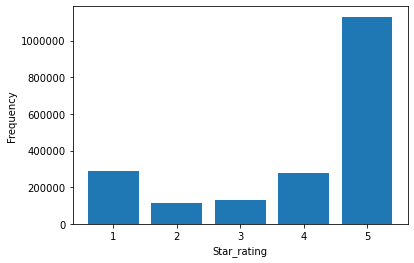

In [83]:
labels, counts = np.unique(df.star_rating, return_counts=True)
plt.bar(labels, counts, align='center')
plt.ticklabel_format(style='plain')
plt.gca().set_xticks(labels)
plt.ylabel('Frequency')
plt.xlabel('Star_rating')
plt.show()

In [13]:
import sys
from itertools import combinations, groupby
from collections import Counter

In [162]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = df[['customer_id','product_id']].drop_duplicates().sort_values(by = ['customer_id']).set_index('customer_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

customer_id
b'10000011'    b'B001CJGM1E'
b'10000016'    b'B00V6REF3Y'
b'10000023'    b'B00BBOI9SO'
b'10000023'    b'B0001OP0KK'
b'10000023'    b'B0013AV8FM'
b'10000093'    b'B001DJ6J5W'
b'10000129'    b'B00472I1V2'
b'10000166'    b'B00BLSW4XQ'
b'10000211'    b'B0043ATR98'
b'10000229'    b'B00G0EJYFW'
Name: item_id, dtype: object

pandas.core.series.Series

In [134]:
df_test = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [135]:
df_test = df_test[['customer_id','product_id']].drop_duplicates().sort_values(by = ['customer_id']).reset_index()
df_test = df_test[['customer_id','product_id']][:11]
df2 = pd.DataFrame([[df_test.customer_id[1],df_test.product_id[4]]], columns=df_test.columns)
df_test = pd.concat([df2, df_test])

df_test = df_test[['customer_id','product_id']].sort_values(by = ['customer_id']).reset_index()
df_test = df_test[['customer_id','product_id']]
df_test

,customer_id,product_id
0,b'10000016',b'B00TXX4MKY'
1,b'10000029',b'B004RSO8A4'
2,b'10000029',b'B00MIMJXUQ'
3,b'10000029',b'B00J9MBDU6'
4,b'1000011',b'B00ITHWTPA'
5,b'10000112',b'B004RSO8A4'
6,b'10000112',b'B005G7Q9CU'
7,b'10000161',b'B00I5B3UGC'
8,b'10000164',b'B00JFS2DBM'
9,b'10000238',b'B0016ZOV94'


In [136]:
for i in range(0,4):
    rep = df_test[:12].copy(deep=True)
    rep.customer_id = rep.customer_id + chr(i + 97).encode("ascii")
    df_test = df_test.append(rep, ignore_index = True)

In [137]:
orders_test = df_test[['customer_id','product_id']].set_index('customer_id')['product_id'].rename('item_id')
display(orders_test.head(12))
type(orders_test)

customer_id
b'10000016'    b'B00TXX4MKY'
b'10000029'    b'B004RSO8A4'
b'10000029'    b'B00MIMJXUQ'
b'10000029'    b'B00J9MBDU6'
b'1000011'     b'B00ITHWTPA'
b'10000112'    b'B004RSO8A4'
b'10000112'    b'B005G7Q9CU'
b'10000161'    b'B00I5B3UGC'
b'10000164'    b'B00JFS2DBM'
b'10000238'    b'B0016ZOV94'
b'10000329'    b'B00L3YPPKC'
b'10000329'    b'B005V1J1WQ'
Name: item_id, dtype: object

pandas.core.series.Series

In [198]:
title_list = df[['product_id', 'product_title', 'product_category']].drop_duplicates()

In [230]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().values
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
        
        #print(list(item_list))
              
        for item_pair in combinations(item_list, 2):
            #print(item_pair)
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift','categoryA','categoryB']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [191]:
def association_rules(order_item, min_support):

    print("Starting orders: {:25d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:12d}".format(min_support, len(qualifying_items)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining customers with 2+ items: {:7d}".format(len(qualifying_orders)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)
    
    #print(list(item_pair_gen))

    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    #print(freq(item_pair_gen))
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:30d}".format(len(item_pairs)))
    
    #print(item_pairs)


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]
    
    #print(item_pairs)

    print("Item pairs with support >= {}: {:7d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
   

    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [192]:
%%time
rules = association_rules(orders_test, 0.0005) 

Starting orders:                        60
Items with support >= 0.0005:           11
Remaining orders:                       60
Remaining customers with 2+ items:      15
Remaining orders:                       35
Item pairs:                              5
Item pairs with support >= 0.0005:       5

Wall time: 48.6 ms


In [193]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
2,b'B00MIMJXUQ',b'B00J9MBDU6',5,0.333333,5,0.333333,5,0.333333,1.0,1.0,3.0
4,b'B00L3YPPKC',b'B005V1J1WQ',5,0.333333,5,0.333333,5,0.333333,1.0,1.0,3.0
0,b'B004RSO8A4',b'B00MIMJXUQ',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5
1,b'B004RSO8A4',b'B00J9MBDU6',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5
3,b'B004RSO8A4',b'B005G7Q9CU',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5


In [160]:
df_test = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [161]:
# Replace item ID with item name and display association rules
item_name   = df_test.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final.drop_duplicates())

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,"b""2014 Fashion Women's Summer Nautical Anchor ...",b'Sourpuss Anchor Cutout Top Black',5,33.333333,5,33.333333,5,33.333333,1.0,1.0,0.030
3,"b""Hello Kitty Girls' Heart Pattern Chambray Dr...","b'Sesame Street Elmo ""Major League"" Shirt - To...",5,33.333333,5,33.333333,5,33.333333,1.0,1.0,0.030
2,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,b'Sourpuss Anchor Cutout Top Black',5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015
4,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,"b""2014 Fashion Women's Summer Nautical Anchor ...",5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015
6,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,b'Erotic Looking Flowers Printed Sarong Paress...,5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015


In [220]:
%%time
rules = association_rules(orders, 0.00008) 

Starting orders:                   1936496
Items with support >= 8e-05:         1493
Remaining orders:                   346929
Remaining customers with 2+ items:   29733
Remaining orders:                    91318
Item pairs:                          79235
Item pairs with support >= 8e-05:   15732

Wall time: 4.5 s


In [185]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
3407,b'B006P030QU',b'B00DTP2GDC',4,0.013453,7,0.023543,8,0.026906,0.571429,0.500000,21.237857
12916,b'B001H55N7C',b'B000FERL1M',4,0.013453,13,0.043722,8,0.026906,0.307692,0.500000,11.435769
6778,b'B00FGPZOOG',b'B00HTC575K',3,0.010090,8,0.026906,12,0.040359,0.375000,0.250000,9.291562
10195,b'B00BIOBP7Y',b'B002ZH63HA',3,0.010090,12,0.040359,11,0.036996,0.250000,0.272727,6.757500
13313,b'B002ZH63HA',b'B00BIOBP7Y',3,0.010090,11,0.036996,12,0.040359,0.272727,0.250000,6.757500
...,...,...,...,...,...,...,...,...,...,...,...
15249,b'B00GGSDWH8',b'B00HK61L3C',3,0.010090,232,0.780278,669,2.250025,0.012931,0.004484,0.005747
10757,b'B00KY5S81O',b'B00N26M2F0',3,0.010090,210,0.706286,740,2.488817,0.014286,0.004054,0.005740
14486,b'B00N277J2A',b'B00M9YQ0J0',3,0.010090,547,1.839707,355,1.193960,0.005484,0.008451,0.004594
7459,b'B00KSQ8ZNA',b'B00N26M2F0',3,0.010090,263,0.884539,740,2.488817,0.011407,0.004054,0.004583


In [34]:
rules.shape

(19136, 11)

In [23]:
rules.dtypes

item_A             object
item_B             object
freqAB              int64
supportAB         float64
freqA               int64
supportA          float64
freqB               int64
supportB          float64
confidenceAtoB    float64
confidenceBtoA    float64
lift              float64
dtype: object

In [196]:
rules = rules.sort_values(by = ['freqAB'], ascending = False)
rules = rules[rules['lift'] >= 1]
rules[:20]

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
1457,b'B00I9J7KSY',b'B00HK6B9X4',206,0.006928,715,0.024047,602,0.020247,0.288112,0.342193,14.229951
672,b'B00N277J2A',b'B00N26M2F0',205,0.006895,547,0.018397,740,0.024888,0.374771,0.277027,15.058217
1704,b'B00N26M2F0',b'B00N277J2A',201,0.006760,740,0.024888,547,0.018397,0.271622,0.367459,14.764398
1481,b'B00I9J7KSY',b'B00J7HQ1L4',192,0.006457,715,0.024047,843,0.028352,0.268531,0.227758,9.471229
1277,b'B00J7HQ1L4',b'B00HK6B9X4',188,0.006323,843,0.028352,602,0.020247,0.223013,0.312292,11.014696
1812,b'B00HK5RFBK',b'B00HK6B9X4',186,0.006256,485,0.016312,602,0.020247,0.383505,0.308970,18.941460
524,b'B00HK6B9X4',b'B00I9J7KSY',181,0.006088,602,0.020247,715,0.024047,0.300664,0.253147,12.503016
437,b'B004KQ9HZY',b'B009YZN8G0',167,0.005617,373,0.012545,465,0.015639,0.447721,0.359140,28.628159
1326,b'B009YZN8G0',b'B004KQ9HZY',164,0.005516,465,0.015639,373,0.012545,0.352688,0.439678,28.113880
898,b'B00J7HQ1L4',b'B00HK5RFBK',162,0.005448,843,0.028352,485,0.016312,0.192171,0.334021,11.781062


In [221]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
3407,b'B006P030QU',b'B00DTP2GDC',4,0.000135,7,0.000235,8,0.000269,0.571429,0.500000,2123.785714
12916,b'B001H55N7C',b'B000FERL1M',4,0.000135,13,0.000437,8,0.000269,0.307692,0.500000,1143.576923
6778,b'B00FGPZOOG',b'B00HTC575K',3,0.000101,8,0.000269,12,0.000404,0.375000,0.250000,929.156250
10195,b'B00BIOBP7Y',b'B002ZH63HA',3,0.000101,12,0.000404,11,0.000370,0.250000,0.272727,675.750000
13313,b'B002ZH63HA',b'B00BIOBP7Y',3,0.000101,11,0.000370,12,0.000404,0.272727,0.250000,675.750000
...,...,...,...,...,...,...,...,...,...,...,...
15249,b'B00GGSDWH8',b'B00HK61L3C',3,0.000101,232,0.007803,669,0.022500,0.012931,0.004484,0.574706
10757,b'B00KY5S81O',b'B00N26M2F0',3,0.000101,210,0.007063,740,0.024888,0.014286,0.004054,0.573996
14486,b'B00N277J2A',b'B00M9YQ0J0',3,0.000101,547,0.018397,355,0.011940,0.005484,0.008451,0.459351
7459,b'B00KSQ8ZNA',b'B00N26M2F0',3,0.000101,263,0.008845,740,0.024888,0.011407,0.004054,0.458324


In [224]:
rules1 = rules
#rules1[['categoryA', 'categoryB']] = ""
item_category = title_list.rename(columns={'product_id':'item_A', 'product_category':'categoryA'})
item_category = item_category[['item_A', 'categoryA']]
rules1 = pd.merge(rules1,item_category,on='item_A', how='left')

item_category = title_list.rename(columns={'product_id':'item_B', 'product_category':'categoryB'})
item_category = item_category[['item_B', 'categoryB']]
rules1 = pd.merge(rules1,item_category,on='item_B', how='left')

rules1 = rules1[rules1['categoryA'] != rules1['categoryB']]
rules1 = rules1.sort_values(by = ['freqAB'], ascending = False)
rules1[:10]

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,categoryA,categoryB
6639,b'B00CUJMDNG',b'B00DPNCEY4',38,0.001278,404,0.013588,299,0.010056,0.094059,0.127090,9.353406,b'Kitchen',b'Health & Personal Care'
653,b'B00G0X49VW',b'B005470CB6',35,0.001177,123,0.004137,184,0.006188,0.284553,0.190217,45.981575,b'Health & Personal Care',b'Kitchen'
780,b'B005470CB6',b'B00G0X49VW',31,0.001043,184,0.006188,123,0.004137,0.168478,0.252033,40.726538,b'Kitchen',b'Health & Personal Care'
5286,b'B00CUJMDNG',b'B00LPR2ZAU',31,0.001043,404,0.013588,204,0.006861,0.076733,0.151961,11.183787,b'Kitchen',b'Health & Personal Care'
1133,b'B00VQNLQL2',b'B00KZ5PUX2',29,0.000975,278,0.009350,97,0.003262,0.104317,0.298969,31.975710,b'Health & Personal Care',b'Kitchen'
8781,b'B00CUJMDNG',b'B00NNTBF22',29,0.000975,404,0.013588,298,0.010023,0.071782,0.097315,7.162079,b'Kitchen',b'Health & Personal Care'
1336,b'B00KZ5PUX2',b'B00VQNLQL2',26,0.000874,97,0.003262,278,0.009350,0.268041,0.093525,28.667878,b'Kitchen',b'Health & Personal Care'
8489,b'B00KNK0M1O',b'B00DPNCEY4',25,0.000841,335,0.011267,299,0.010056,0.074627,0.083612,7.421005,b'Kitchen',b'Health & Personal Care'
8090,b'B00CUJMDNG',b'B00I9QDRQG',25,0.000841,404,0.013588,236,0.007937,0.061881,0.105932,7.796243,b'Kitchen',b'Health & Personal Care'
1264,b'B00KSQ8ZNA',b'B00LN8B0Q6',25,0.000841,263,0.008845,95,0.003195,0.095057,0.263158,29.750851,b'Home Improvement',b'Health & Personal Care'


In [231]:
# Replace item ID with item name and display association rules
item_name   = title_list.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules1, item_name).sort_values('freqAB', ascending=False)
rules_final = rules_final.drop_duplicates()
display(rules_final[:10])

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,categoryA,categoryB
0,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Liquid Vitamin D Drops - 2oz D3 100 Iu Per D...,38,0.001278,404,0.013588,299,0.010056,0.094059,0.127090,9.353406,b'Kitchen',b'Health & Personal Care'
1896,b'Ozeri ZB19-W Rev Digital Bathroom Scale with...,b'Ozeri Green Earth Textured Ceramic Nonstick ...,35,0.001177,123,0.004137,184,0.006188,0.284553,0.190217,45.981575,b'Health & Personal Care',b'Kitchen'
2098,b'Ozeri Green Earth Textured Ceramic Nonstick ...,b'Ozeri ZB19-W Rev Digital Bathroom Scale with...,31,0.001043,184,0.006188,123,0.004137,0.168478,0.252033,40.726538,b'Kitchen',b'Health & Personal Care'
43,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Athelas Neutraceuticals Natural Triple Stren...,31,0.001043,404,0.013588,204,0.006861,0.076733,0.151961,11.183787,b'Kitchen',b'Health & Personal Care'
85,b'Natizo Stainless Steel Measuring Spoon Set -...,b'PRO-15 Advanced Strength Probiotics: 3x the ...,29,0.000975,404,0.013588,298,0.010023,0.071782,0.097315,7.162079,b'Kitchen',b'Health & Personal Care'
2251,b'#1 Booster Supplement \xe2\x80\x93 Enhance S...,"b'Ice Ball Maker Mold by BAR KRAFT, 4x4.5cm Ic...",29,0.000975,278,0.009350,97,0.003262,0.104317,0.298969,31.975710,b'Health & Personal Care',b'Kitchen'
2260,"b'Ice Ball Maker Mold by BAR KRAFT, 4x4.5cm Ic...",b'#1 Booster Supplement \xe2\x80\x93 Enhance S...,26,0.000874,97,0.003262,278,0.009350,0.268041,0.093525,28.667878,b'Kitchen',b'Health & Personal Care'
1,b'Savvy Infusion Water Bottles - 24 or 32 Ounc...,b'Liquid Vitamin D Drops - 2oz D3 100 Iu Per D...,25,0.000841,335,0.011267,299,0.010056,0.074627,0.083612,7.421005,b'Kitchen',b'Health & Personal Care'
122,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Toniiq Ultra Premium Hangover Prevention',25,0.000841,404,0.013588,236,0.007937,0.061881,0.105932,7.796243,b'Kitchen',b'Health & Personal Care'
2326,b'asin marketplace id Search Attribute Val...,b'iProv\xc3\xa8n ET-116 Ear Thermometer - The ...,25,0.000841,263,0.008845,95,0.003195,0.095057,0.263158,29.750851,b'Home Improvement',b'Health & Personal Care'


In [197]:
# Replace item ID with item name and display association rules
item_name   = title_list.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('freqAB', ascending=False)
rules_final = rules_final.drop_duplicates()
display(rules_final[:50])

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,b'Ubervita Ubersurge Endurance Pre Workout Ene...,206,0.006928,715,0.024047,602,0.020247,0.288112,0.342193,14.229951
216,b'Nexgen Biolabs Xentrafen PM Thermogenic Non-...,b'Nexgen Biolabs Xentrafen Maximum Strength Di...,205,0.006895,547,0.018397,740,0.024888,0.374771,0.277027,15.058217
994,b'Nexgen Biolabs Xentrafen Maximum Strength Di...,b'Nexgen Biolabs Xentrafen PM Thermogenic Non-...,201,0.006760,740,0.024888,547,0.018397,0.271622,0.367459,14.764398
14,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,b'Ubervita Ubertest All Natural Testosterone B...,192,0.006457,715,0.024047,843,0.028352,0.268531,0.227758,9.471229
1,b'Ubervita Ubertest All Natural Testosterone B...,b'Ubervita Ubersurge Endurance Pre Workout Ene...,188,0.006323,843,0.028352,602,0.020247,0.223013,0.312292,11.014696
2,"b""Ubervita Uberday Men's Multivitamin, Superio...",b'Ubervita Ubersurge Endurance Pre Workout Ene...,186,0.006256,485,0.016312,602,0.020247,0.383505,0.308970,18.941460
1160,b'Ubervita Ubersurge Endurance Pre Workout Ene...,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,181,0.006088,602,0.020247,715,0.024047,0.300664,0.253147,12.503016
1177,"b""Hydroxycut Pro Clinical, America's Number 1 ...","b'Muscletech Hydroxycut Nutrition Gummies, Mix...",167,0.005617,373,0.012545,465,0.015639,0.447721,0.359140,28.628159
1329,"b'Muscletech Hydroxycut Nutrition Gummies, Mix...","b""Hydroxycut Pro Clinical, America's Number 1 ...",164,0.005516,465,0.015639,373,0.012545,0.352688,0.439678,28.113880
32,b'Ubervita Ubertest All Natural Testosterone B...,"b""Ubervita Uberday Men's Multivitamin, Superio...",162,0.005448,843,0.028352,485,0.016312,0.192171,0.334021,11.781062
